# import

In [1]:
import os
import random
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from PIL import Image

from sklearn.preprocessing import LabelEncoder

# load data

In [2]:
path = './data/train/'
images = []
labels = []
for filename in glob(path + '*'): # 폴더(라벨) 경로
    for img in glob(filename + '/*.jpg'): # 개별 이미지 경로
        img_open = Image.open(img) # 이미지 로드
        img_arr = np.array(img_open) # 배열화
        images.append(img_arr)
        
        label = filename.split('\\')[1] # 라벨 추출
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

In [3]:
images.shape, labels.shape

((50000, 32, 32, 3), (50000,))

In [4]:
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = labels.reshape(-1, 1)
labels.shape

(50000, 1)

# EDA

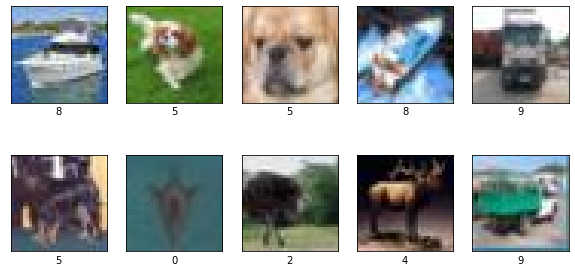

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    num = random.randint(0, images.shape[0])
    
    plt.subplot(2, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labels[num][0])
    plt.imshow(images[num])
plt.show()

c:\workspace\mlProject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


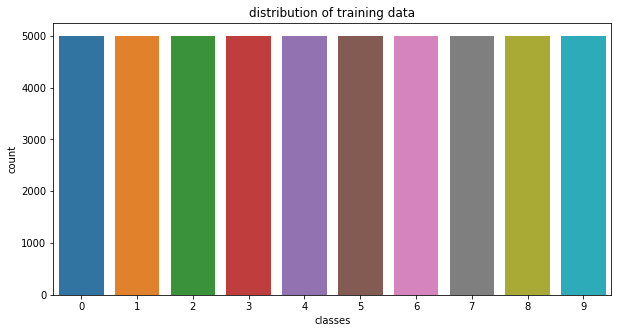

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(labels.ravel()) # 다차원을 1차원으로 변환
plt.title('distribution of training data')
plt.xlabel('classes')
plt.show()